In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime, time
from funs import *

import wfdb

In [31]:
sig, fields = wfdb.rdsamp('mimic2db/a40104/a40104_000000', pbdl=1, dldir='data')
print(fields)

Downloaded all missing files for record.
{'nseg': 1, 'nsig': 2, 'fs': 125.0, 'nsamp': 14917500, 'basetime': '16:34:36.912', 'basedate': '30/07/2010', 'filename': ['a40104_000000.dat', 'a40104_000000.dat'], 'fmt': ['80', '80'], 'sampsperframe': [1, 1], 'skew': [0, 0], 'byteoffset': [0, 0], 'gain': [80.0, 1.25], 'units': ['mV', 'mmHg'], 'baseline': [0, -100], 'initvalue': [1, 252], 'signame': ['II', 'ABP'], 'nsampseg': [], 'comments': [' a40104_000000 2 125 14917500 16:34:36.912  30/07/2010', ' -----', ' a40104_000000 2 125 14917500 16:34:36.912  30/07/2010', ' -----']}


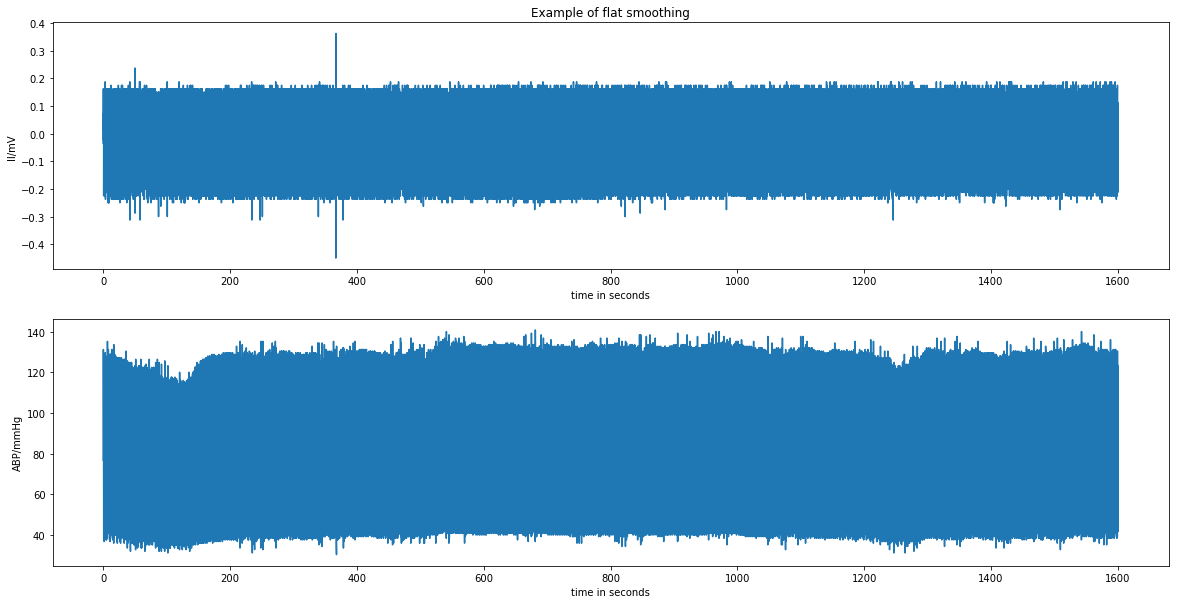

In [114]:
sig1 = sig[:200000]
myplot(sig1, fields, title='Example of flat smoothing')

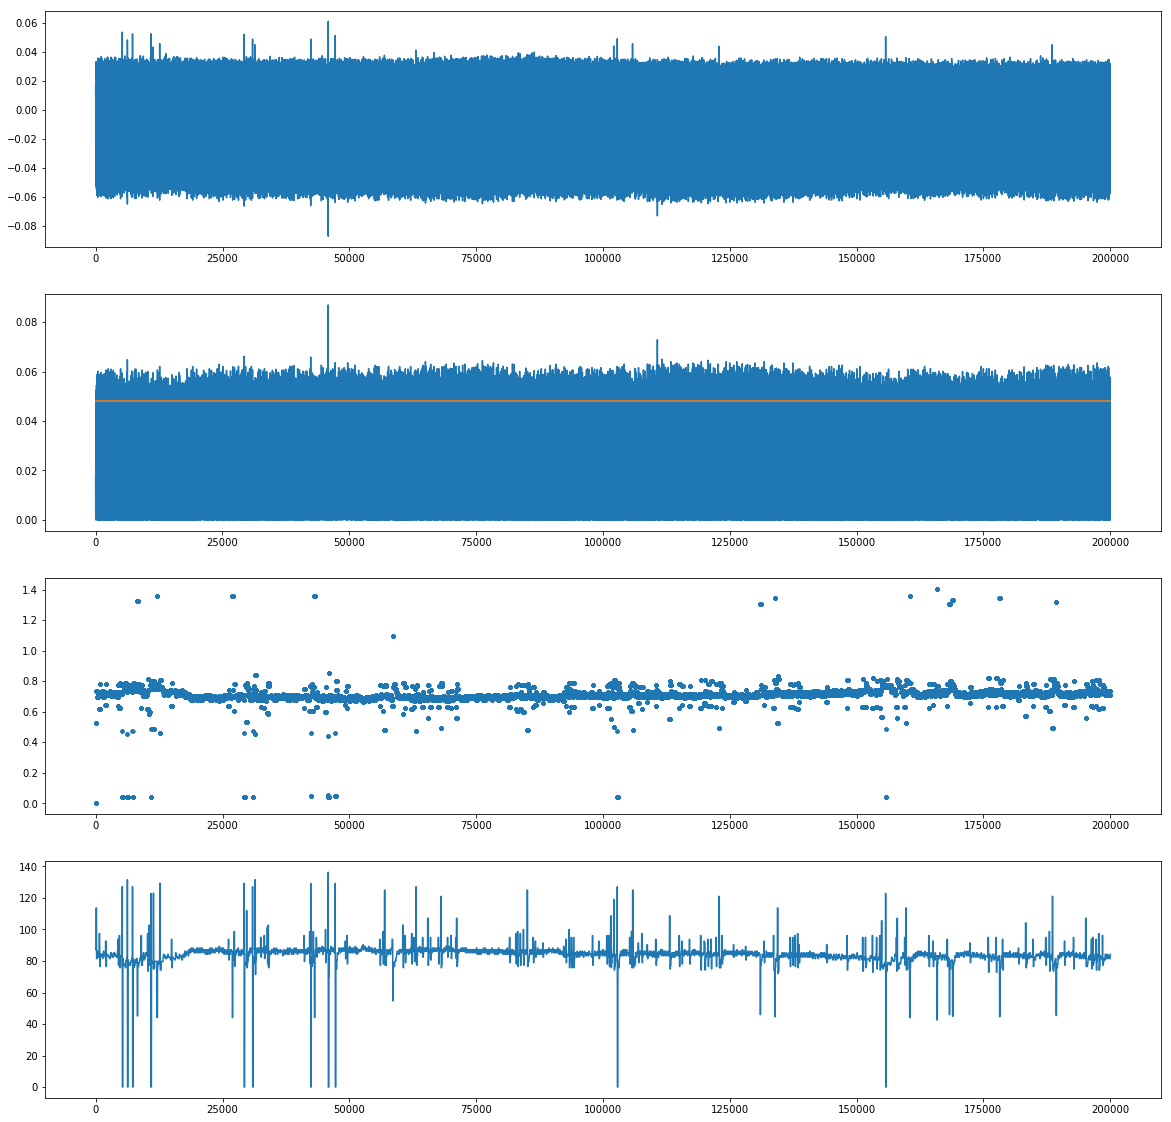

0.0483298663588


In [115]:
smoothed = smooth(sig1[:, 0], window='blackman')[10:-10]
signal_diff = np.diff(smoothed)
signal_diff = np.append(signal_diff, 0)
abs_diff = np.sqrt(signal_diff ** 2)
ecg_threshold = np.average(abs_diff) * 5

count = 0
last_val = .0
current_rr = .0
current_count = .0

rr_intervals_array = []
rr_intervals_rate = []

for k, val in enumerate(abs_diff):
    count = count + 1
    if (val > ecg_threshold and last_val < ecg_threshold):
        current_rr = count / (fields['fs'])
        current_rate = 60.0 / current_rr
        count = 0
    last_val = val
    rr_intervals_array.append(current_rr)
    rr_intervals_rate.append(current_rate if current_rate < 220 else 0)

fig, ax = plt.subplots(4, figsize=(20, 20))
ax[0].plot(signal_diff)
ax[1].plot(abs_diff)
ax[1].plot([0, len(sig1)-1], [ecg_threshold, ecg_threshold])
ax[2].plot(rr_intervals_array, '.')
ax[3].plot(rr_intervals_rate)
plt.show()
print(ecg_threshold)